In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img
from tensorflow import keras
import tensorflow.keras.backend as K
from collections import defaultdict
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_hub as hub
import cv2
import sys
sys.path.insert(0,'F:/Nilgai_photo_database/Nilgai Classifier/Nilgai/code')
sys.path.insert(0,'F:/Nilgai_photo_database/Nilgai Classifier/Nilgai/code/binary_class')

In [2]:
nilgai = 'C:/Users/ncu116/Desktop/nilgai.jpg'
pig = 'C:/Users/ncu116/Desktop/pig.jpg'
jag = 'C:/Users/ncu116/Desktop/jaguar.jpg'
nil_doe = 'C:/Users/ncu116/Desktop/nilgaidoe.jpg'
deer_doe = 'C:/Users/ncu116/Desktop/deerdoe.jpg'

## ML Mastery Tutorial

In [3]:
# define original model
model = InceptionV3(weights='imagenet')

In [74]:
# list number of layers
print("Number of total Layers: ", len(model.layers))
print()
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'mix' not in layer.name:
        continue
        # summarize output shape
    print(i, layer.name, layer.output.shape)

Number of total Layers:  313

40 mixed0 (None, 35, 35, 256)
63 mixed1 (None, 35, 35, 288)
86 mixed2 (None, 35, 35, 288)
100 mixed3 (None, 17, 17, 768)
132 mixed4 (None, 17, 17, 768)
164 mixed5 (None, 17, 17, 768)
196 mixed6 (None, 17, 17, 768)
228 mixed7 (None, 17, 17, 768)
248 mixed8 (None, 8, 8, 1280)
276 mixed9_0 (None, 8, 8, 768)
279 mixed9 (None, 8, 8, 2048)
307 mixed9_1 (None, 8, 8, 768)
310 mixed10 (None, 8, 8, 2048)


In [84]:
lyr_names = [model.layers[x].name for x in range(len(model.layers))]
# lyr_names
# model.summary()

In [85]:
# redefine model to output right after the first hidden layer
re_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[310].output)

In [86]:
# define test image
test_image = nilgai
# load the image with the required shape
img = image.load_img(test_image, target_size=(299, 299))
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = re_model.predict(img)
print(feature_maps.shape)

(1, 8, 8, 2048)


Text(0.5, 1.0, 'Original Image')

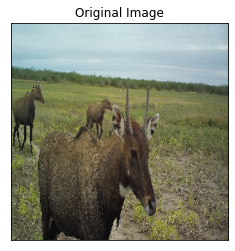

In [87]:
# load the image with the required shape
orig_img = image.load_img(test_image, target_size=(299, 299))
# create copy for original image imshow
orig_img = image.img_to_array(orig_img)
# rescale manually to show image
orig_img = orig_img/255. 

# create plot for original test image
f,ax = plt.subplots(figsize=(6,4))
ax.imshow(orig_img)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Original Image")

In [88]:
# Get the indices of maximum element in numpy array
max_indx = np.where(feature_maps == np.max(feature_maps))
max_feature_map = feature_maps
max_indx

(array([0], dtype=int64),
 array([4], dtype=int64),
 array([3], dtype=int64),
 array([1817], dtype=int64))

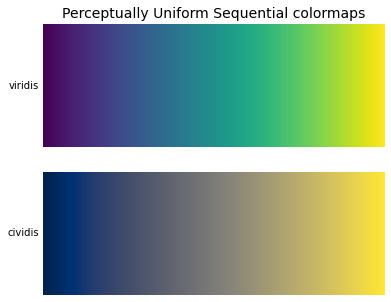

In [89]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = ['viridis', 'cividis']


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

Text(0.5, 1.0, 'mix10')

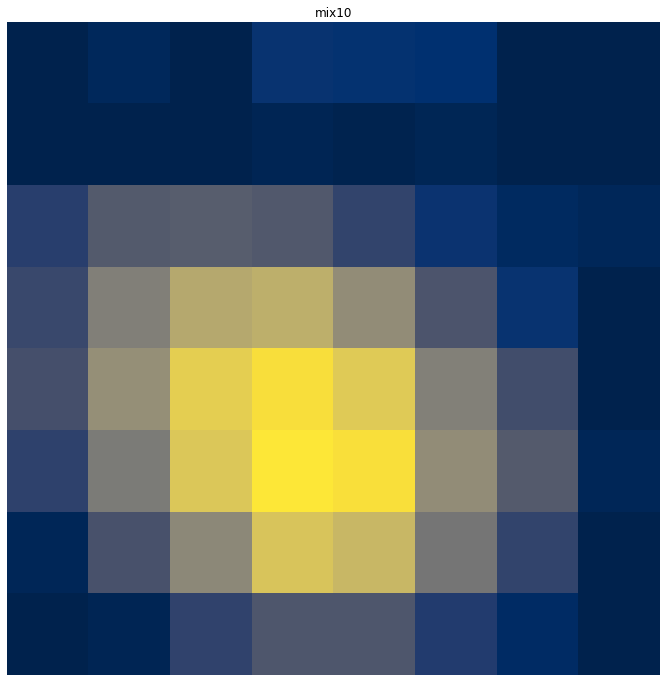

In [94]:
f,ax = plt.subplots(figsize=(12,12))
ax.imshow(feature_maps[0,:,:,1370], cmap='cividis')
ax.axis('OFF')
ax.set_title('mix10')

In [91]:
feature_maps
fig, axes = plt.subplots(figsize=(18, 4))
plt.imshow(feature_maps, aspect='auto', interpolation='none', origin='lower', cmap='cividis')
plt.ylim()
axes.axis('off')

TypeError: Invalid shape (1, 8, 8, 2048) for image data

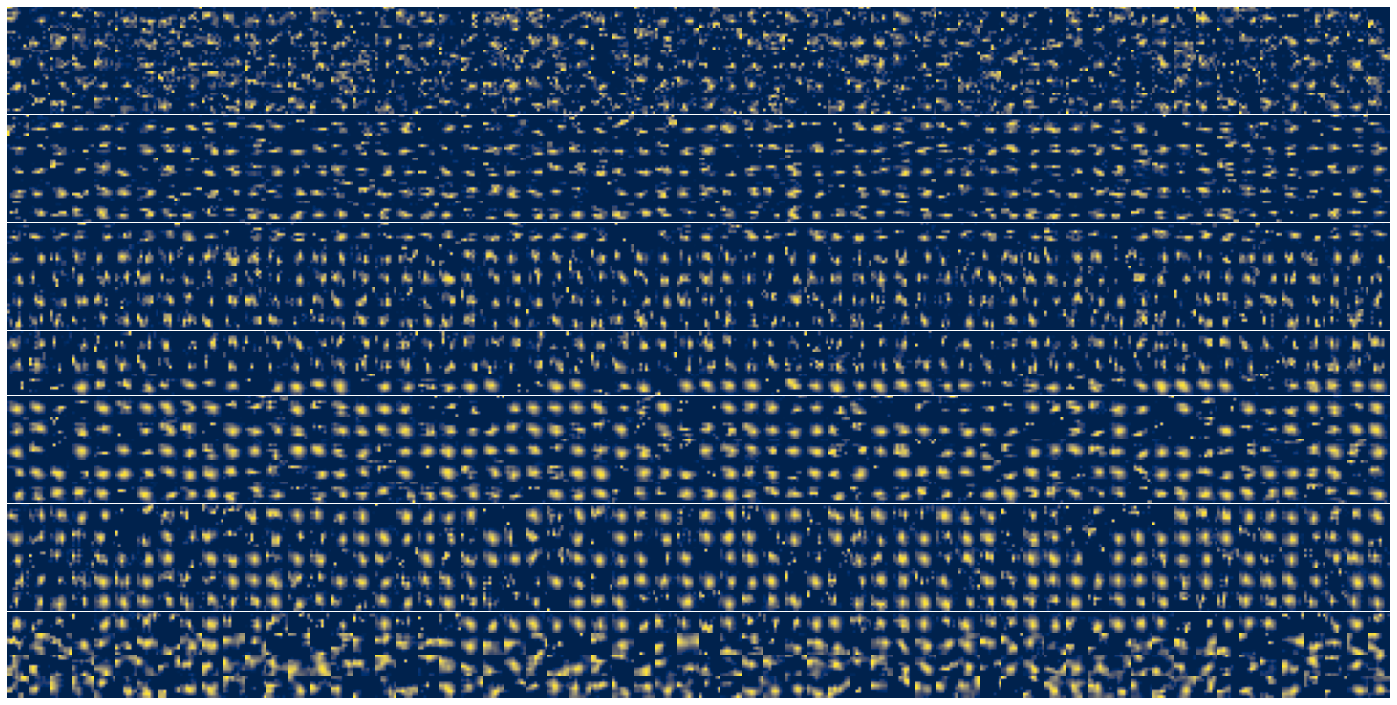

In [83]:
square =1
aspect = 1.
n = 32 # number of rows
m = 64 # numberof columns
bottom = 0.1; left=0.05
top=1.-bottom; right = 1.-0.18
fisasp = (1-bottom-(1-top))/float( 1-left-(1-right) )
#widthspace, relative to subplot size
wspace=0.01  # set to zero for no spacing
hspace=wspace/float(aspect)
#fix the figure height
figheight=12 # inch
figwidth = (m + (m-1)*wspace)/float((n+(n-1)*hspace)*aspect)*figheight*fisasp

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(figwidth, figheight))

plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, 
                    wspace=wspace, hspace=hspace)

for i, ax in enumerate(axes.flatten()):
	ax = plt.subplot(32, 64, i+1)
# for _ in range(square):
	# for _ in range(square):
		# specify subplot and turn of axis
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
	plt.imshow(feature_maps[0, :, :, i-1], cmap='cividis')
	ax.axis('off')

plt.show()

In [119]:
# list number of layers
print("Number of total Layers: ", len(model.layers))
print()
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'pool' not in layer.name:
        continue
        # summarize output shape
    print(i, layer.name, layer.output.shape)

Number of total Layers:  313

10 max_pooling2d (None, 73, 73, 64)
17 max_pooling2d_1 (None, 35, 35, 192)
27 average_pooling2d (None, 35, 35, 192)
50 average_pooling2d_1 (None, 35, 35, 256)
73 average_pooling2d_2 (None, 35, 35, 288)
99 max_pooling2d_2 (None, 17, 17, 288)
119 average_pooling2d_3 (None, 17, 17, 768)
151 average_pooling2d_4 (None, 17, 17, 768)
183 average_pooling2d_5 (None, 17, 17, 768)
215 average_pooling2d_6 (None, 17, 17, 768)
247 max_pooling2d_3 (None, 8, 8, 768)
262 average_pooling2d_7 (None, 8, 8, 1280)
293 average_pooling2d_8 (None, 8, 8, 2048)
311 avg_pool (None, 2048)


In [120]:
# redefine model to output right after the first hidden layer
# ixs = [40, 63,86, 100,132,164,196, 228,248,276,279,307, 310]
ixs = [10 ,17 ,27 ,50 ,73 ,99,119 ,151 , 277 , 308 ]
outputs = [model.layers[i+1].output for i in ixs]
multi_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
multi_model.summary()

Model: "model_75"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
___________________________________________________________________________________________

In [125]:
# define test image
test_image = pigs
# load the image with the required shape
img = image.load_img(test_image, target_size=(299, 299))
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = multi_model.predict(img)
# activ_list = [activations[0], activations[1],activations[2], activations[3],activations[4], activations[5],activations[6], activations[7],activations[8], activations[9]]
# print(feature_maps)

In [95]:

# plot the output from each block
square = 5
for fmap in feature_maps:
    plt.subplots(figsize=(24,24))
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(fmap[0, :, :, ix-1], cmap='viridis')
            ix += 1
        # show the figure
    plt.show()


IndexError: too many indices for array